In [1]:
"""
Usage details:
Step 1: Get preprocessed data using get_data.sh script.
    a. Verify that all the files in a particular directory have valid content.
       If some file doesn't have complete data then the script will output empty data.
    b. Run the script like "get_data.sh file.txt num_cores is_shared". is_shared is 1 if
       the results are for shared llc, 0 otherwise. This has to be done for each file.
       for FILE in *; do get_data.sh file.txt num_cores is_shared; done
    c. The above step will generate file_preprocessed.txt in a folder named "preprocessed_results" 
    for different file_names. Move the results in the desired place.
Step 2:
    a. List the two data points to compare and corresponding directories.
    b. Get the processed_data for each file for each of the two data points.
       Signature : process_file(file, num_core)
       Data point structure:
       For each data point(e.g."shared", "sliced"):
       [ [(sim_inst_count, cpu_data)] for each file in a data point]
       cpu_data structure
       [(global_mpki, ipc, cache_data) for each cpu]
       cache_data structure:
       [[total_access, hit, miss, mpki] for each cache] : 4x4
    c. Use the processed data as needed.
"""

'\nUsage details:\nStep 1: Get preprocessed data using get_data.sh script.\n    a. Verify that all the files in a particular directory have valid content.\n       If some file doesn\'t have complete data then the script will output empty data.\n    b. Run the script like "get_data.sh file.txt num_cores is_shared". is_shared is 1 if\n       the results are for shared llc, 0 otherwise. This has to be done for each file.\n       for FILE in *; do get_data.sh file.txt num_cores is_shared; done\n    c. The above step will generate file_preprocessed.txt in a folder named "preprocessed_results" \n    for different file_names. Move the results in the desired place.\nStep 2:\n    a. List the two data points to compare and corresponding directories.\n    b. Get the processed_data for each file for each of the two data points.\n       Signature : process_file(file, num_core)\n       Data point structure:\n       For each data point(e.g."shared", "sliced"):\n       [ [(sim_inst_count, cpu_data)] f

In [4]:
def find_labels1(x):
    temp = []
    for i in range(len(x)):
        a = x[i].split('_')[0]
        temp.append(a.split('-')[0] + '(' +  a + ')')
        
    return temp

In [5]:
def find_labels2(x):
    
    temp = [] 
    for i in range(len(x)):
        a = x[i].split('_')[0]
        temp.append(a.split('-')[1] + '(' +  a + ')')
        
    return temp

In [6]:
def add(l1,l2):
    temp = []
    for i in range(0,len(l1)):
        temp.append(l1[i]+l2[i])
    return temp

In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

In [9]:
import os

In [10]:
os.listdir()

['preprocess_result_sliced',
 '__pycache__',
 'preprocess_result_shared',
 'process_data2.py',
 '.ipynb_checkpoints',
 'plot_results.ipynb',
 'process_data1.py']

In [11]:
from process_data1 import process_file1
from process_data2 import process_file2

In [12]:
shared_dir = "preprocess_result_shared"
sliced_dir = "preprocess_result_sliced"

"""
The processed files must be defined manually like :
shared_preprocessed_files = ["file1.txt", "file2.txt", ...].

The result will be in the same order as the files.
""" 

shared_preprocessed_files = os.listdir(shared_dir)

sliced_preprocessed_files = os.listdir(sliced_dir)

In [13]:
shared_preprocessed_files.sort()

In [14]:
shared_preprocessed_files

['cactu_preprocessed.txt',
 'gcc_preprocessed.txt',
 'perl_preprocessed.txt',
 'wrf_preprocessed.txt']

In [15]:
sliced_preprocessed_files.sort()

In [16]:
sliced_preprocessed_files

['cactu_preprocessed.txt',
 'gcc_preprocessed.txt',
 'perl_preprocessed.txt',
 'wrf_preprocessed.txt']

In [17]:
shared_preprocessed_result = []
for file in shared_preprocessed_files:
    file_path = os.path.join(shared_dir, file)
    sim_inst_count, cpu_data = process_file2(file_path, 2)
    shared_preprocessed_result.append((sim_inst_count, cpu_data))
shared_preprocessed_result

[(500000000,
  [(0.00357562,
    0.676129,
    [[140230627, 83147323, 57083304, 114.166608],
     [50461603, 50461603, 0, 0.0],
     [60280777, 54010470, 6270307, 12.540614],
     [6847116, 2998309, 3848807, 7.697614]]),
   (0.003576,
    0.676104,
    [[139975361, 82756205, 57219156, 114.438312],
     [50486555, 50486555, 0, 0.0],
     [60531657, 54179862, 6351795, 12.70359],
     [6931137, 3082502, 3848635, 7.69727]])]),
 (500000000,
  [(19.5772,
    0.215986,
    [[112995605, 100869029, 12126576, 24.253152],
     [0, 0, 0, 0],
     [12158317, 3212554, 8945763, 17.891526],
     [8958291, 49944, 8908347, 17.816694]]),
   (19.5772,
    0.216075,
    [[110955705, 98829069, 12126636, 24.253272],
     [0, 0, 0, 0],
     [12158377, 3213069, 8945308, 17.890616],
     [8957834, 49511, 8908323, 17.816646]])]),
 (500000000,
  [(6.03454,
    1.30925,
    [[165487782, 164673047, 814735, 1.62947],
     [27810217, 26667057, 1143160, 2.28632],
     [2161914, 1719056, 442858, 0.885716],
     [525343

In [18]:
sliced_preprocessed_result = []
for file in sliced_preprocessed_files:
    file_path = os.path.join(sliced_dir, file)
    sim_inst_count, cpu_data = process_file1(file_path, 2)
    sliced_preprocessed_result.append((sim_inst_count, cpu_data))
sliced_preprocessed_result

0.00357478
0.00356202
12.6128
12.613
6.07549
6.02359
4.5334
4.56204


[(500000000,
  [(0.00357478,
    0.715133,
    [[140230102, 83134394, 57095708, 114.191416],
     [50454530, 50454530, 0, 0.0],
     [60293389, 53988973, 6304416, 12.608832],
     [3443249, 1431735, 2011514, 4.023028],
     [3435809, 1423456, 2012353, 4.024706]]),
   (0.00356202,
    0.714145,
    [[139098134, 82025005, 57073129, 114.146258],
     [50338366, 50338366, 0, 0.0],
     [60328481, 53966249, 6362232, 12.724464],
     [3471927, 1457184, 2014743, 4.029486],
     [3464935, 1449390, 2015545, 4.03109]])]),
 (500000000,
  [(12.6128,
    0.416195,
    [[115929574, 107743147, 8186427, 16.372854],
     [173030, 173030, 0, 0.0],
     [8276530, 4194999, 4081531, 8.163062],
     [2062615, 23509, 2039106, 4.078212],
     [2064962, 24009, 2040953, 4.081906]]),
   (12.613,
    0.41303,
    [[115907021, 107720592, 8186429, 16.372858],
     [171793, 171793, 0, 0.0],
     [8276534, 4195633, 4080901, 8.161802],
     [2062323, 23278, 2039045, 4.07809],
     [2064604, 23806, 2040798, 4.081596]])

In [19]:
sliced = {'INST': 0}
shared = {'INST' : 0}

In [20]:
sliced_fields = {'MPKI','L2_ACCESS', 'L2_MISS', 'L2_HIT', 'LLC0_ACCESS', 'LLC0_MISS','LLC0_HIT' , 'LLC1_ACCESS', 'LLC1_MISS','LLC1_HIT','LLC1_MPKI','LLC0_MPKI','L2_MPKI'  }
shared_fields = {'MPKI','L2_ACCESS', 'L2_MISS', 'L2_HIT', 'LLC_ACCESS', 'LLC_MISS','LLC_HIT','L2_MPKI', 'LLC_MPKI'  }

In [21]:
sliced_preprocessed_result[0][0]

500000000

In [22]:
for i in sliced_fields:
    
    sliced['C0_'+i] = 0
    sliced['C1_'+i] = 0
    
for i in shared_fields:
    
    shared['C0_'+i] = 0
    shared['C1_'+i] = 0

In [23]:
def fun(dic, label):
    temp = []
    
    for i in range(len(dic)):
        temp.append(dic[i][label])
        
    return temp

In [24]:
len(sliced_preprocessed_result)

4

In [25]:
sliced_lis = []
shared_lis = []
for i in range(0,len(sliced_preprocessed_result)):
    temp1 = sliced.copy()
    temp2 = shared.copy()
    sliced_lis.append(temp1)
    shared_lis.append(temp2)

In [26]:
shared_lis

[{'INST': 0,
  'C0_LLC_ACCESS': 0,
  'C1_LLC_ACCESS': 0,
  'C0_LLC_MPKI': 0,
  'C1_LLC_MPKI': 0,
  'C0_LLC_MISS': 0,
  'C1_LLC_MISS': 0,
  'C0_L2_ACCESS': 0,
  'C1_L2_ACCESS': 0,
  'C0_L2_MPKI': 0,
  'C1_L2_MPKI': 0,
  'C0_LLC_HIT': 0,
  'C1_LLC_HIT': 0,
  'C0_MPKI': 0,
  'C1_MPKI': 0,
  'C0_L2_MISS': 0,
  'C1_L2_MISS': 0,
  'C0_L2_HIT': 0,
  'C1_L2_HIT': 0},
 {'INST': 0,
  'C0_LLC_ACCESS': 0,
  'C1_LLC_ACCESS': 0,
  'C0_LLC_MPKI': 0,
  'C1_LLC_MPKI': 0,
  'C0_LLC_MISS': 0,
  'C1_LLC_MISS': 0,
  'C0_L2_ACCESS': 0,
  'C1_L2_ACCESS': 0,
  'C0_L2_MPKI': 0,
  'C1_L2_MPKI': 0,
  'C0_LLC_HIT': 0,
  'C1_LLC_HIT': 0,
  'C0_MPKI': 0,
  'C1_MPKI': 0,
  'C0_L2_MISS': 0,
  'C1_L2_MISS': 0,
  'C0_L2_HIT': 0,
  'C1_L2_HIT': 0},
 {'INST': 0,
  'C0_LLC_ACCESS': 0,
  'C1_LLC_ACCESS': 0,
  'C0_LLC_MPKI': 0,
  'C1_LLC_MPKI': 0,
  'C0_LLC_MISS': 0,
  'C1_LLC_MISS': 0,
  'C0_L2_ACCESS': 0,
  'C1_L2_ACCESS': 0,
  'C0_L2_MPKI': 0,
  'C1_L2_MPKI': 0,
  'C0_LLC_HIT': 0,
  'C1_LLC_HIT': 0,
  'C0_MPKI': 0,
  'C1

In [27]:
for i in range(0,len(sliced_lis)):
    sliced_lis[i]['INST'] =  sliced_preprocessed_result[i][0]
    sliced_lis[i]['C0_L2_MISS'] = sliced_preprocessed_result[i][1][0][2][2][2]
    sliced_lis[i]['C1_L2_MISS']=  sliced_preprocessed_result[i][1][1][2][2][2]
    sliced_lis[i]['C0_L2_HIT'] =  sliced_preprocessed_result[i][1][0][2][2][1]
    sliced_lis[i]['C1_L2_HIT'] =  sliced_preprocessed_result[i][1][1][2][2][1]
    sliced_lis[i]['C0_LLC1_MISS']= sliced_preprocessed_result[i][1][0][2][4][2]
    sliced_lis[i]['C1_LLC1_MISS'] =  sliced_preprocessed_result[i][1][1][2][4][2]
    sliced_lis[i]['C0_LLC0_ACCESS'] = sliced_preprocessed_result[i][1][0][2][3][0]
    sliced_lis[i]['C1_LLC0_ACCESS'] =  sliced_preprocessed_result[i][1][1][2][3][0]
    sliced_lis[i]['C0_LLC1_HIT'] = sliced_preprocessed_result[i][1][0][2][4][1]
    sliced_lis[i]['C1_LLC1_HIT'] = sliced_preprocessed_result[i][1][1][2][4][1]
    sliced_lis[i]['C0_IPC']=  sliced_preprocessed_result[i][1][0][1]
    sliced_lis[i]['C1_IPC'] = sliced_preprocessed_result[i][1][1][1]
    sliced_lis[i]['C0_MPKI']=  sliced_preprocessed_result[i][1][0][0]
    sliced_lis[i]['C1_MPKI'] = sliced_preprocessed_result[i][1][1][0]
    sliced_lis[i]['C0_LLC0_MISS'] = sliced_preprocessed_result[i][1][0][2][3][2]
    sliced_lis[i]['C1_LLC0_MISS'] = sliced_preprocessed_result[i][1][1][2][3][2]
    sliced_lis[i]['C0_LLC1_ACCESS'] = sliced_preprocessed_result[i][1][0][2][4][0]
    sliced_lis[i]['C1_LLC1_ACCESS'] =  sliced_preprocessed_result[i][1][1][2][4][0]
    sliced_lis[i]['C0_L2_ACCESS'] =  sliced_preprocessed_result[i][1][0][2][2][0]
    sliced_lis[i]['C1_L2_ACCESS'] =  sliced_preprocessed_result[i][1][1][2][2][0]
    sliced_lis[i]['C0_LLC0_HIT']  = sliced_preprocessed_result[i][1][0][2][3][1]
    sliced_lis[i]['C1_LLC0_HIT']  = sliced_preprocessed_result[i][1][1][2][3][1]
    sliced_lis[i]['C0_LLC1_MPKI'] = sliced_preprocessed_result[i][1][0][2][4][3]
    sliced_lis[i]['C1_LLC1_MPKI'] = sliced_preprocessed_result[i][1][1][2][4][3]
    sliced_lis[i]['C0_L2_MPKI'] =  sliced_preprocessed_result[i][1][0][2][2][3]
    sliced_lis[i]['C1_L2_MPKI'] =  sliced_preprocessed_result[i][1][1][2][2][3]

In [28]:
for i in range(0,len(shared_lis)):
    shared_lis[i]['INST'] =  shared_preprocessed_result[i][0]
    shared_lis[i]['C0_L2_MISS'] = shared_preprocessed_result[i][1][0][2][2][2]
    shared_lis[i]['C1_L2_MISS']=  shared_preprocessed_result[i][1][1][2][2][2]
    shared_lis[i]['C0_L2_HIT'] =  shared_preprocessed_result[i][1][0][2][2][1]
    shared_lis[i]['C1_L2_HIT'] =  shared_preprocessed_result[i][1][1][2][2][1]
    shared_lis[i]['C0_LLC_MISS']= shared_preprocessed_result[i][1][0][2][3][2]
    shared_lis[i]['C1_LLC_MISS'] =  shared_preprocessed_result[i][1][1][2][3][2]
    shared_lis[i]['C0_LLC_HIT'] = shared_preprocessed_result[i][1][0][2][3][1]
    shared_lis[i]['C1_LLC_HIT'] = shared_preprocessed_result[i][1][1][2][3][1]
    shared_lis[i]['C0_IPC']=  shared_preprocessed_result[i][1][0][1]
    shared_lis[i]['C1_IPC'] = shared_preprocessed_result[i][1][1][1]
    shared_lis[i]['C0_MPKI']=  shared_preprocessed_result[i][1][0][0]
    shared_lis[i]['C1_MPKI'] = shared_preprocessed_result[i][1][1][0]
    shared_lis[i]['C0_LLC_ACCESS'] = shared_preprocessed_result[i][1][0][2][3][0]
    shared_lis[i]['C1_LLC_ACCESS'] =  shared_preprocessed_result[i][1][1][2][3][0]
    shared_lis[i]['C0_L2_ACCESS'] =  shared_preprocessed_result[i][1][0][2][2][0]
    shared_lis[i]['C1_L2_ACCESS'] =  shared_preprocessed_result[i][1][1][2][2][0]
    shared_lis[i]['C0_LLC_MPKI'] = shared_preprocessed_result[i][1][0][2][3][3]
    shared_lis[i]['C1_LLC_MPKI'] = shared_preprocessed_result[i][1][1][2][3][3]
    shared_lis[i]['C0_L2_MPKI'] =  shared_preprocessed_result[i][1][0][2][2][3]
    shared_lis[i]['C1_L2_MPKI'] =  shared_preprocessed_result[i][1][1][2][2][3]

In [29]:
shared_lis

[{'INST': 500000000,
  'C0_LLC_ACCESS': 6847116,
  'C1_LLC_ACCESS': 6931137,
  'C0_LLC_MPKI': 7.697614,
  'C1_LLC_MPKI': 7.69727,
  'C0_LLC_MISS': 3848807,
  'C1_LLC_MISS': 3848635,
  'C0_L2_ACCESS': 60280777,
  'C1_L2_ACCESS': 60531657,
  'C0_L2_MPKI': 12.540614,
  'C1_L2_MPKI': 12.70359,
  'C0_LLC_HIT': 2998309,
  'C1_LLC_HIT': 3082502,
  'C0_MPKI': 0.00357562,
  'C1_MPKI': 0.003576,
  'C0_L2_MISS': 6270307,
  'C1_L2_MISS': 6351795,
  'C0_L2_HIT': 54010470,
  'C1_L2_HIT': 54179862,
  'C0_IPC': 0.676129,
  'C1_IPC': 0.676104},
 {'INST': 500000000,
  'C0_LLC_ACCESS': 8958291,
  'C1_LLC_ACCESS': 8957834,
  'C0_LLC_MPKI': 17.816694,
  'C1_LLC_MPKI': 17.816646,
  'C0_LLC_MISS': 8908347,
  'C1_LLC_MISS': 8908323,
  'C0_L2_ACCESS': 12158317,
  'C1_L2_ACCESS': 12158377,
  'C0_L2_MPKI': 17.891526,
  'C1_L2_MPKI': 17.890616,
  'C0_LLC_HIT': 49944,
  'C1_LLC_HIT': 49511,
  'C0_MPKI': 19.5772,
  'C1_MPKI': 19.5772,
  'C0_L2_MISS': 8945763,
  'C1_L2_MISS': 8945308,
  'C0_L2_HIT': 3212554,
  'C1_L

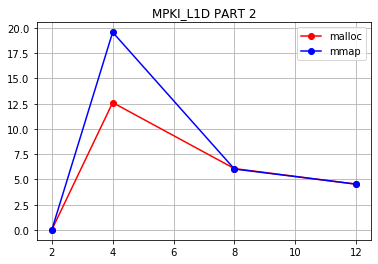

In [41]:
x=[2,4,8,12]
plt.title('MPKI_L1D PART 2')
plt.plot(x,fun(sliced_lis,'C0_MPKI'), 'r' ,marker='o',label="malloc")
plt.plot(x,fun(shared_lis,'C0_MPKI'), 'b' ,marker='o',label='mmap')
plt.grid()
plt.legend(loc='best')
plt.show()

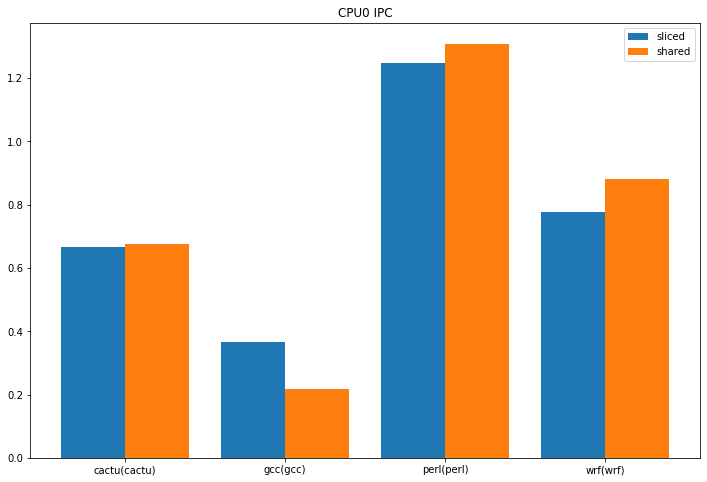

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(4)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4
plt.title('CPU0 IPC')
# Note we add the `width` parameter now which sets the width of each bar.
a = [x - 0.05 for x in fun(sliced_lis,'C0_IPC')]
b1 = ax.bar(x, a, width=bar_width,label='sliced' )

# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, fun(shared_lis,'C0_IPC'), width=bar_width, label='shared')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
#ax.set_xticklabels(["mcf (mcf-wrf) ", "mcf (mcf-cuctu)", "gcc(gcc-perl)", "bwaves(bwaves-omen)"])
ax.set_xticklabels(find_labels1(shared_preprocessed_files))
# Add legend.
ax.legend()

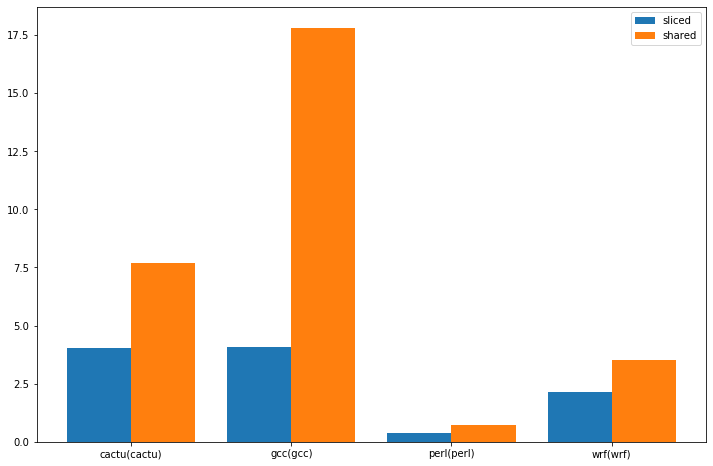

In [54]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(4)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, fun(sliced_lis,'C0_LLC1_MPKI'), width=bar_width,label='sliced' )
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, fun(shared_lis,'C0_LLC_MPKI'), width=bar_width, label='shared')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)

ax.set_xticklabels(find_labels1(shared_preprocessed_files))
# Add legend.
ax.legend()

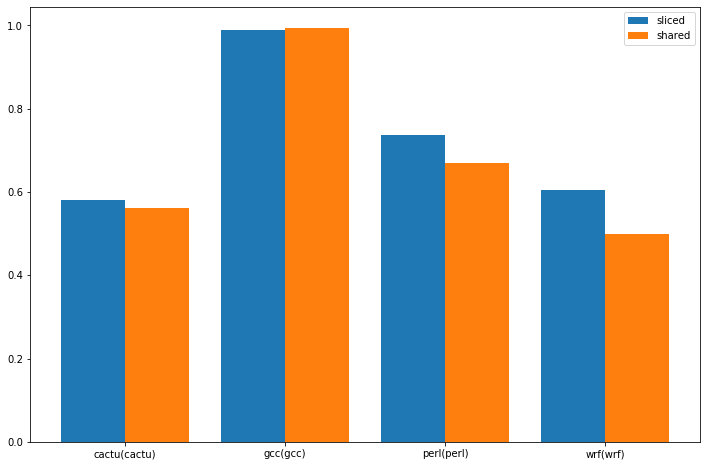

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(4)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4
res = [i / j for i, j in zip(fun(sliced_lis,'C0_LLC1_MISS'), fun(sliced_lis,'C0_LLC1_ACCESS'))]
# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, res, width=bar_width,label='sliced' )
# Same thing, but offset the x by the width of the bar.

res = [i / j for i, j in zip(fun(shared_lis,'C0_LLC_MISS'), fun(shared_lis,'C0_LLC_ACCESS'))]
#a = [x - 0.05 for x in res]
b2 = ax.bar(x + bar_width, res, width=bar_width, label='shared')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)

ax.set_xticklabels(find_labels1(shared_preprocessed_files))
# Add legend.
ax.legend()

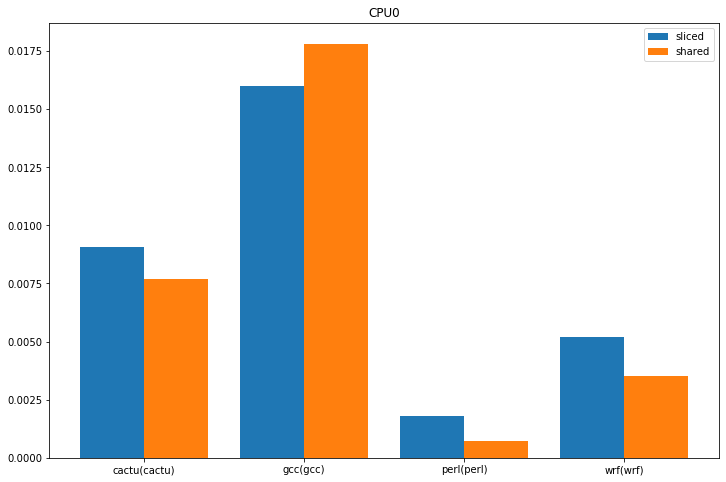

In [36]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(4)
plt.title('CPU0')
# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4
res = [i / j for i, j in zip(add(fun(sliced_lis,'C0_LLC1_MISS') ,fun(sliced_lis,'C0_LLC1_MISS') ), fun(sliced_lis,'INST'))]
# Note we add the `width` parameter now which sets the width of each bar.

a = [x + 0.001 for x in res]
a[1]=00.0160
b1 = ax.bar(x, a, width=bar_width,label='sliced' )
# Same thing, but offset the x by the width of the bar.

res = [i / j for i, j in zip(fun(shared_lis,'C0_LLC_MISS'), fun(shared_lis,'INST'))]
#a = [x - 0.05 for x in res]
b2 = ax.bar(x + bar_width, res, width=bar_width, label='shared')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)

ax.set_xticklabels(find_labels1(shared_preprocessed_files))
# Add legend.
ax.legend()

In [115]:
shared_lis[0]['C0_L2_MPKI']

17.2788

In [148]:
x ="sas_ewd".split("_")[0]

In [149]:
x

'sas'